In [4]:
import pandas as pd
import os
import numpy as np
import pandas_profiling

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns
sns.set(style="whitegrid") # can set style depending on how you'd like it to look

import folium  #needed for interactive map
from folium.plugins import HeatMap

import branca

import geopandas
from shapely.geometry import Polygon
from shapely.geometry import Point
from geopandas import GeoDataFrame

plotsize = (15,6)

In [5]:
path = 'Dataset/Parquets'
uber_trips = pd.read_parquet(path + '/uber_trips_nta.parquet', engine = 'pyarrow')

### Trip graphs

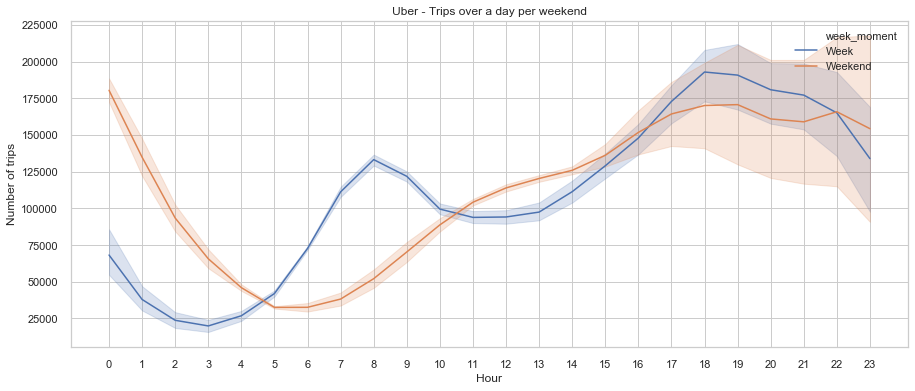

In [7]:
uber_trips['pickup_hour'] = uber_trips['pickup_datetime'].dt.hour
uber_trips['pickup_weekday'] = uber_trips['pickup_datetime'].dt.dayofweek
uber_trips['week_moment'] = np.where(uber_trips['pickup_weekday'] <= 4, 'Week', 'Weekend')
uber_trips['pickup_weekday'] = np.where(uber_trips['pickup_weekday'] == 0, 'Monday',
                                           np.where(uber_trips['pickup_weekday'] == 1, 'Tuesday',
                                                   np.where(uber_trips['pickup_weekday'] == 2, 'Wednesday',
                                                           np.where(uber_trips['pickup_weekday'] == 3, 'Thursday',
                                                                   np.where(uber_trips['pickup_weekday'] == 4, 'Friday',
                                                                           np.where(uber_trips['pickup_weekday'] == 5, 'Saturday', 'Sunday'))))))

Trips_hour = uber_trips.groupby(['pickup_hour', 'pickup_weekday', 'week_moment'])['ntacode'].count().reset_index(name = 'trips')
#Accidents_Hour['HOUR'] = Accidents_Hour['HOUR'].astype('str')

fig, ax = plt.subplots(figsize = plotsize)
m = sns.lineplot(x="pickup_hour", y="trips", hue = 'week_moment', data=Trips_hour, ax=ax)
ax.set(xlabel='Hour', ylabel='Number of trips')
ax.set_xticks(np.arange(0, 24,1))
#plt.xticks(rotation=90);
plt.xticks
#plt.ylim(0, 18000)
plt.title('Uber - Trips over a day per weekend');
path = 'Results'
plt.savefig(path + '/Images/uber_trips_hour_week.png')

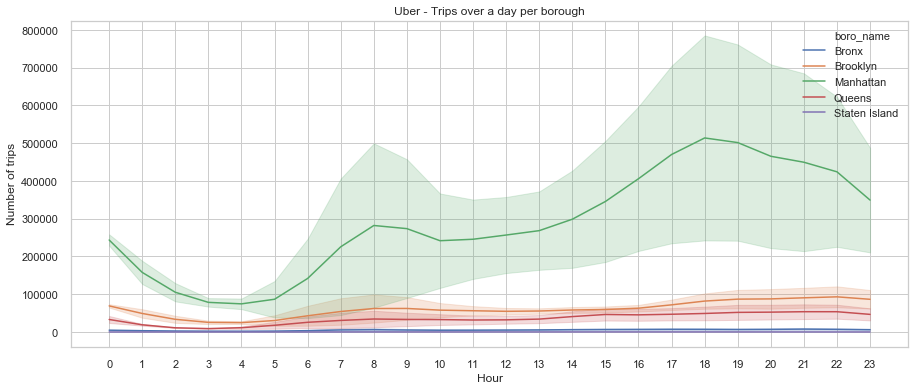

In [9]:
uber_trips['pickup_hour'] = uber_trips['pickup_datetime'].dt.hour
uber_trips['pickup_weekday'] = uber_trips['pickup_datetime'].dt.dayofweek
uber_trips['week_moment'] = np.where(uber_trips['pickup_weekday'] <= 4, 'Week', 'Weekend')
uber_trips['pickup_weekday'] = np.where(uber_trips['pickup_weekday'] == 0, 'Monday',
                                           np.where(uber_trips['pickup_weekday'] == 1, 'Tuesday',
                                                   np.where(uber_trips['pickup_weekday'] == 2, 'Wednesday',
                                                           np.where(uber_trips['pickup_weekday'] == 3, 'Thursday',
                                                                   np.where(uber_trips['pickup_weekday'] == 4, 'Friday',
                                                                           np.where(uber_trips['pickup_weekday'] == 5, 'Saturday', 'Sunday'))))))

Trips_hour = uber_trips.groupby(['pickup_hour', 'boro_name', 'week_moment'])['ntacode'].count().reset_index(name = 'trips')
#Accidents_Hour['HOUR'] = Accidents_Hour['HOUR'].astype('str')
#Trips_hour = Trips_hour.loc[Trips_hour['boro_name_pickup'] != 'Manhattan']

fig, ax = plt.subplots(figsize = plotsize)
m = sns.lineplot(x="pickup_hour", y="trips", hue = 'boro_name', data=Trips_hour, ax=ax)
ax.set(xlabel='Hour', ylabel='Number of trips')
ax.set_xticks(np.arange(0, 24,1))
#plt.xticks(rotation=90);
plt.xticks
#plt.ylim(0, 18000)
plt.title('Uber - Trips over a day per borough');
path = 'Results'
plt.savefig(path + '/Images/uber_trips_hour_borough.png')

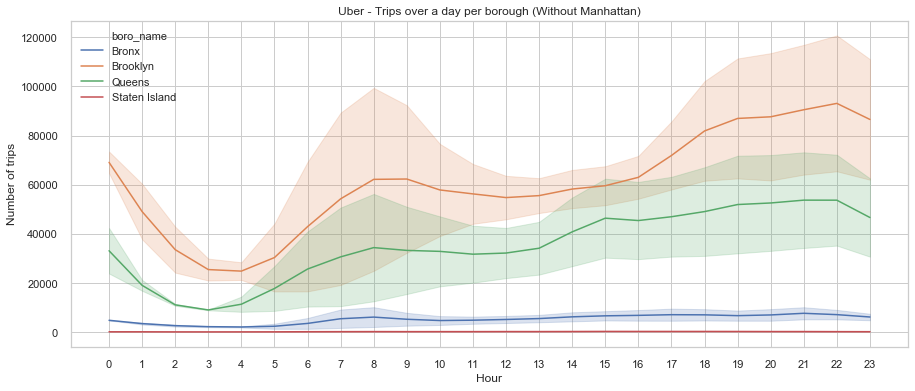

In [10]:
uber_trips['pickup_hour'] = uber_trips['pickup_datetime'].dt.hour
uber_trips['pickup_weekday'] = uber_trips['pickup_datetime'].dt.dayofweek
uber_trips['week_moment'] = np.where(uber_trips['pickup_weekday'] <= 4, 'Week', 'Weekend')
uber_trips['pickup_weekday'] = np.where(uber_trips['pickup_weekday'] == 0, 'Monday',
                                           np.where(uber_trips['pickup_weekday'] == 1, 'Tuesday',
                                                   np.where(uber_trips['pickup_weekday'] == 2, 'Wednesday',
                                                           np.where(uber_trips['pickup_weekday'] == 3, 'Thursday',
                                                                   np.where(uber_trips['pickup_weekday'] == 4, 'Friday',
                                                                           np.where(uber_trips['pickup_weekday'] == 5, 'Saturday', 'Sunday'))))))

Trips_hour = uber_trips.groupby(['pickup_hour', 'boro_name', 'week_moment'])['ntacode'].count().reset_index(name = 'trips')
#Accidents_Hour['HOUR'] = Accidents_Hour['HOUR'].astype('str')
Trips_hour = Trips_hour.loc[Trips_hour['boro_name'] != 'Manhattan']

fig, ax = plt.subplots(figsize = plotsize)
m = sns.lineplot(x="pickup_hour", y="trips", hue = 'boro_name', data=Trips_hour, ax=ax)
ax.set(xlabel='Hour', ylabel='Number of trips')
ax.set_xticks(np.arange(0, 24,1))
#plt.xticks(rotation=90);
plt.xticks
#plt.ylim(0, 18000)
plt.title('Uber - Trips over a day per borough (Without Manhattan)');
path = 'Results'
plt.savefig(path + '/Images/uber_trips_hour_borough_no_manhattan.png')

#### Boxplots

In [11]:
uber_trips['pickup_month_dt'] = pd.to_datetime(uber_trips['pickup_datetime']).dt.to_period('M')
uber_trips['pickup_date'] = pd.to_datetime(uber_trips['pickup_datetime']).dt.to_period('d')
uber_trips['pickup_hour'] = pd.to_datetime(uber_trips['pickup_datetime']).dt.hour
uber_trips['pickup_weekday'] = uber_trips['pickup_datetime'].dt.dayofweek
uber_trips['weekend'] = np.where(uber_trips['pickup_weekday'] <= 4, False, True)
uber_trips['rush'] = np.where(((uber_trips['pickup_hour'] >= 6) & (uber_trips['pickup_hour'] <= 9)) |
                               ((uber_trips['pickup_hour'] >= 15) & (uber_trips['pickup_hour'] <= 20)), True, False)

In [13]:
uber_trips_day = uber_trips.groupby(['pickup_month_dt', 'pickup_date', 'weekend', 'rush'])['ntacode'].count().reset_index(name = 'trips')
uber_trips_day.head()

,pickup_month_dt,pickup_date,weekend,rush,trips
0,2014-04,2014-04-01,False,False,5184
1,2014-04,2014-04-01,False,True,8955
2,2014-04,2014-04-02,False,False,6265
3,2014-04,2014-04-02,False,True,10820
4,2014-04,2014-04-03,False,False,8316


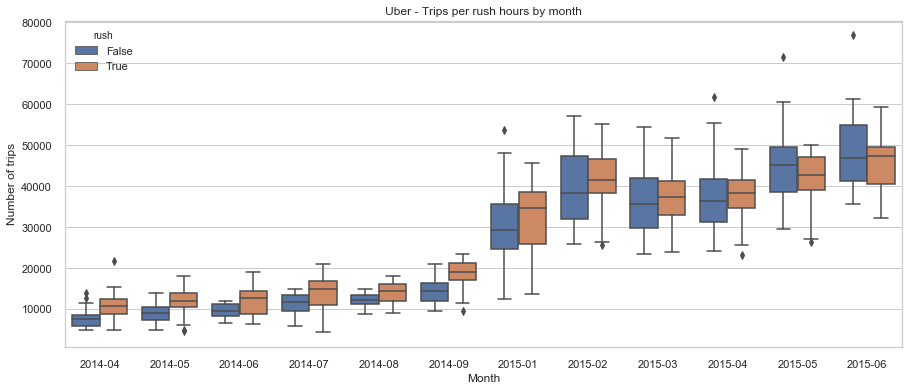

In [14]:
fig, ax = plt.subplots(figsize = plotsize)
m = sns.boxplot(x="pickup_month_dt", y="trips", hue = 'rush', data=uber_trips_day, ax=ax)
ax.set(xlabel='Month', ylabel='Number of trips')
#ax.set_xticks(np.arange(0, 24,1))
#plt.xticks(rotation=90);
plt.xticks
#plt.ylim(0, 18000)
plt.title('Uber - Trips per rush hours by month');
path = 'Results'
plt.savefig(path + '/Images/uber_trips_month_rush.png')

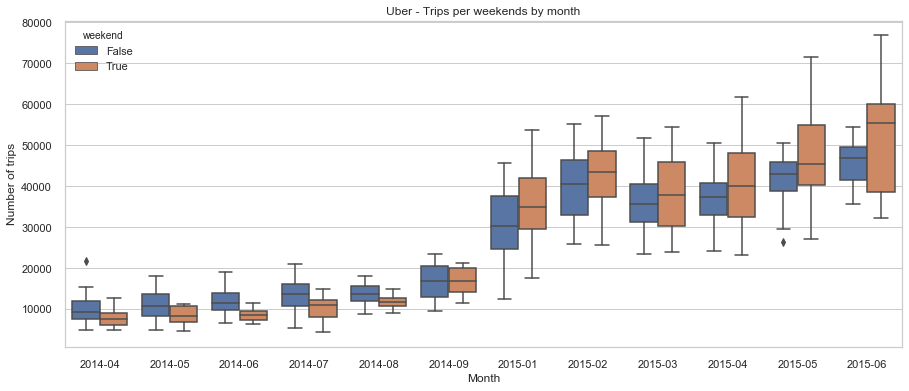

In [15]:
fig, ax = plt.subplots(figsize = plotsize)
m = sns.boxplot(x="pickup_month_dt", y="trips", hue = 'weekend', data=uber_trips_day, ax=ax)
ax.set(xlabel='Month', ylabel='Number of trips')
#ax.set_xticks(np.arange(0, 24,1))
#plt.xticks(rotation=90);
plt.xticks
#plt.ylim(0, 18000)
plt.title('Uber - Trips per weekends by month');
path = 'Results'
plt.savefig(path + '/Images/uber_trips_month_weekend.png')

### Hipothesys testing

**Hypothesis:** The distance of the trips that took place in rush hours is statistically similar with the ones in non-rush hours

$$H_0: \mu_1=\mu_2$$
$$H_a: \mu_1 \neq \mu_2$$

In [11]:
green_trips_rush = green_trips.loc[(green_trips['rush'] == True)]
green_trips_norush = green_trips.loc[(green_trips['rush'] == False)]

In [12]:
from scipy import stats
statistic, pvalue = stats.ttest_ind(green_trips_rush.trip_distance, 
                                    green_trips_norush.trip_distance, 
                                    equal_var=False)
statistic, pvalue

(-50.082351772032396, 0.0)

**Conclusion:** There is enough statistical evidence to assert that the distance of the trips that took place in rush hours is statistically **different** with the ones in non-rush hours

# Maps for NTA analysis

In [17]:
path = 'Dataset/Parquets'
uber_trips = pd.read_parquet(path + '/uber_trips_nta.parquet', engine = 'pyarrow')

# Opens the map as a GeoDataFrame
path = 'Dataset/Original'
nyc_bouroughs = geopandas.read_file(path + '/Neighborhood Tabulation Areas.geojson')

In [18]:
uber_trips_nta = uber_trips.groupby('ntacode')['pickup_datetime'].count().reset_index(name = 'trips')
#uber_trips_nta.rename({'ntacode_pickup':'ntacode'}, inplace = True, axis = 1)

nyc_bouroughs_trips = nyc_bouroughs.merge(uber_trips_nta, how = 'left', on = 'ntacode')
nyc_bouroughs_trips['trips'].fillna(0, inplace = True)
nyc_bouroughs_trips.head()

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry,trips
0,BK88,54005018.7472,047,Borough Park,39247.2280737,Brooklyn,3,"MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...",17450.0
1,QN51,52488276.477,081,Murray Hill,33266.904811,Queens,4,"MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...",7116.0
2,QN27,19726845.26,081,East Elmhurst,19816.7115378,Queens,4,"MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...",15110.0
3,QN07,22887772.7683,081,Hollis,20976.3358374,Queens,4,"MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...",1995.0
4,MN06,10647077.6122,061,Manhattanville,17040.6865482,Manhattan,1,"MULTIPOLYGON (((-73.94608 40.82126, -73.94640 ...",21381.0


In [19]:
# interactive visualization for beat-specific crime rate in 2017

m_trips = folium.Map(location=[40.738, -73.98],
                        zoom_start=11,
                        tiles="OpenStreetMap")

colormap = branca.colormap.LinearColormap(
    colors=['white','yellow','orange','red','darkred'],
    #index=beat_cn['count'].quantile([0.2,0.4,0.6,0.8]),b
    vmin=nyc_bouroughs_trips.trips.min(),
    vmax=nyc_bouroughs_trips.trips.max()
)

style_function = lambda x: {
    'fillColor': colormap(x['properties']['trips']),
    'color': 'black',
    'weight':2,
    'fillOpacity':0.5
}

stategeo = folium.GeoJson(
    nyc_bouroughs_trips.to_json(),
    name='Chicago beats',
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['ntaname', 'trips'],
        aliases=['NTA', 'Total trips'], 
        localize=True
    )
).add_to(m_trips)

colormap.add_to(m_trips)

path = 'Results'
m_trips.save(path + "/Maps/trips_nta_uber_map.html")

In [22]:
# nta_code population
path = 'Dataset/Original'
demographics = pd.read_csv(path + '/demographics.csv', sep = ',', doublequote = True)

In [26]:
nyc_bouroughs_demo = nyc_bouroughs_trips.merge(demographics, how = 'left', 
                                               left_on = 'ntacode', right_on = 'nta_code')
nyc_bouroughs_demo.population.fillna(0, inplace = True)
nyc_bouroughs_demo.head()

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry,trips,nta_name,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,BK88,54005018.7472,047,Borough Park,39247.2280737,Brooklyn,3,"MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...",17450.0,Borough Park,...,4893.0,3850.0,3711.0,4098.0,2136.0,2486.0,1043.0,783.0,35754.0,55689.0
1,QN51,52488276.477,081,Murray Hill,33266.904811,Queens,4,"MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...",7116.0,Murray Hill,...,1665.0,2443.0,2151.0,2850.0,2140.0,2233.0,1031.0,906.0,52696.0,71925.0
2,QN27,19726845.26,081,East Elmhurst,19816.7115378,Queens,4,"MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...",15110.0,East Elmhurst,...,617.0,730.0,1004.0,1173.0,860.0,766.0,295.0,128.0,51594.0,66284.0
3,QN07,22887772.7683,081,Hollis,20976.3358374,Queens,4,"MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...",1995.0,Hollis,...,561.0,559.0,723.0,1204.0,655.0,1086.0,492.0,223.0,59368.0,75975.0
4,MN06,10647077.6122,061,Manhattanville,17040.6865482,Manhattan,1,"MULTIPOLYGON (((-73.94608 40.82126, -73.94640 ...",21381.0,Manhattanville,...,943.0,918.0,1303.0,917.0,599.0,421.0,168.0,79.0,29182.0,40748.0


In [29]:
nyc_bouroughs_demo['trips_population'] = np.where(nyc_bouroughs_demo['population'] == 0, 0, nyc_bouroughs_demo['trips']/nyc_bouroughs_demo['population'])

In [32]:
# interactive visualization for beat-specific crime rate in 2017

m_trips = folium.Map(location=[40.738, -73.98],
                        zoom_start=11,
                        tiles="OpenStreetMap")

colormap = branca.colormap.LinearColormap(
    colors=['white','yellow','orange','red','darkred'],
    #index=beat_cn['count'].quantile([0.2,0.4,0.6,0.8]),b
    vmin=nyc_bouroughs_demo.trips_population.min(),
    vmax=nyc_bouroughs_demo.trips_population.max()
)

style_function = lambda x: {
    'fillColor': colormap(x['properties']['trips_population']),
    'color': 'black',
    'weight':2,
    'fillOpacity':0.5
}

stategeo = folium.GeoJson(
    nyc_bouroughs_demo.to_json(),
    name='Chicago beats',
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['ntaname', 'trips_population'],
        aliases=['NTA', 'Total trips per population'], 
        localize=True
    )
).add_to(m_trips)

colormap.add_to(m_trips)

path = 'Results'
m_trips.save(path + "/Maps/trips_pop_nta_uber_map.html")

In [33]:
path = 'DataSet/Parquets'
nyc_bouroughs_demo_save = nyc_bouroughs_demo.copy()
nyc_bouroughs_demo_save.drop('geometry', axis = 1, inplace = True)
nyc_bouroughs_demo_save.to_parquet(path + '/nyc_bouroughs_trips_uber.parquet', engine = 'pyarrow')